In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Matplotlib is building the font cache; this may take a moment.


### Read all the tables from lecture

In [6]:
patients = pd.read_csv('./data/PATIENTS.csv')
admissions = pd.read_csv('./data/ADMISSIONS.csv')
diagnoses = pd.read_csv('./data/DIAGNOSES_ICD.csv')
icustays = pd.read_csv('./data/ICUSTAYS.csv')
diagnoses_labels = pd.read_csv('./data/D_ICD_DIAGNOSES.csv')

### Add age of patients

In [7]:
# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age


# Apply calculate_age function to create "age" column
patients["age"] = patients.apply(
    lambda row: calculate_age(row["dob"], row["dod"]), axis=1
)

# Filter out rows with age greater than or equal to 120
patients = patients[patients["age"] < 120]

### Read additional new tables

#### Exploring Prescriptions Table

In [66]:
prescriptions = pd.read_csv('./data/PRESCRIPTIONS.csv')
prescriptions.head()

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6494300.0,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,536338101.0,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,574705050.0,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,904516561.0,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,121054410.0,100mg UD Cup,100,mg,1,UDCUP,PO


#### Visualization-1 (Word of Cloud of prescribed medicines)

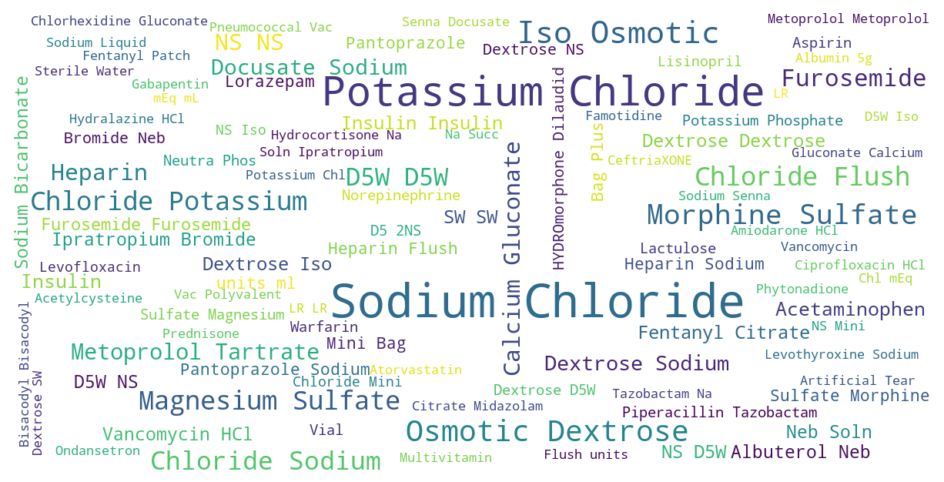

In [86]:
wordcloud = WordCloud(
    max_font_size=60, max_words=100, background_color="white", width=1200, height=600
).generate(' '.join(prescriptions['drug']))

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Join Prescription table with Patient

In [ ]:
df_patient_prescription = pd.merge(
    patients, prescriptions, on='subject_id', how='inner'
)
df_patient_prescription.info()
# df_patient_prescription.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9946 entries, 0 to 9945
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id_x           9946 non-null   int64  
 1   subject_id         9946 non-null   int64  
 2   gender             9946 non-null   object 
 3   dob                9946 non-null   object 
 4   dod                9946 non-null   object 
 5   dod_hosp           6352 non-null   object 
 6   dod_ssn            8140 non-null   object 
 7   expire_flag        9946 non-null   int64  
 8   age                9946 non-null   int64  
 9   row_id_y           9946 non-null   int64  
 10  hadm_id            9946 non-null   int64  
 11  icustay_id         6757 non-null   float64
 12  startdate          9946 non-null   object 
 13  enddate            9945 non-null   object 
 14  drug_type          9946 non-null   object 
 15  drug               9946 non-null   object 
 16  drug_name_poe      5506 

In [44]:
df_patient_prescription.head()

,row_id_x,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age,row_id_y,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71,299224,142345,NaN,2164-10-23 00:00:00,2164-11-01 00:00:00,MAIN,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,NACLFLUSH,NaN,0.000000e+00,Syringe,3,ml,0.6,SYR,IV
1,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71,299225,142345,NaN,2164-10-23 00:00:00,2164-10-23 00:00:00,MAIN,Glipizide,Glipizide,Glipizide,GLIP10,1776.0,5.107908e+10,10MG TAB,10,mg,1,TAB,PO
2,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71,299226,142345,NaN,2164-10-23 00:00:00,2164-11-01 00:00:00,MAIN,Metoprolol,Metoprolol,Metoprolol,METO50,5132.0,5.107908e+10,50mg Tab,150,mg,3,TAB,PO
3,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71,299227,142345,NaN,2164-10-23 00:00:00,2164-10-29 00:00:00,MAIN,Sevelamer,Sevelamer,Sevelamer HCl,SEVE800,46485.0,5.846800e+10,800mg Tab,800,mg,1,TAB,PO
4,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71,299228,142345,NaN,2164-10-23 00:00:00,2164-11-01 00:00:00,MAIN,Insulin,Insulin,Insulin,INSULIN,27413.0,0.000000e+00,Dummy Pkg for POE pump and PHA SS ordering,0,UNIT,0,VIAL,SC


#### Visualization-2 (Frequency Distribution of Top 15 Medicines by Gender)

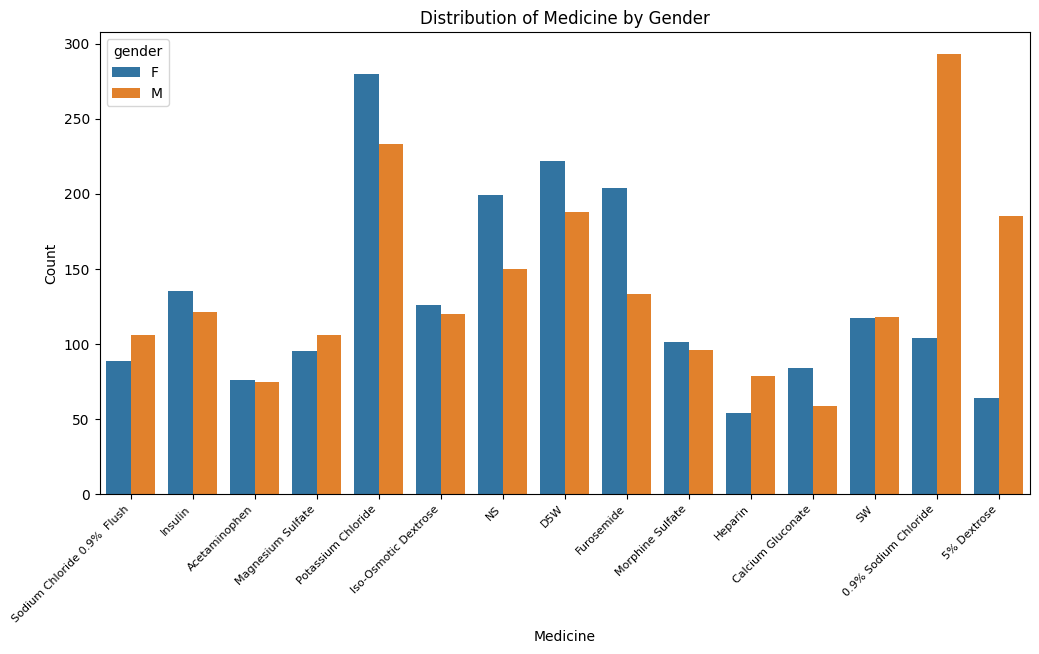

In [96]:
top_medicines = df_patient_prescription["drug"].value_counts().nlargest(15).index
df_filtered = df_patient_prescription[
    df_patient_prescription["drug"].isin(top_medicines)
]

# Set up the figure
plt.figure(figsize=(12, 6))

sns.countplot(data=df_filtered, x="drug", hue="gender")
plt.title("Distribution of Medicine by Gender")
plt.xlabel("Medicine")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right", fontsize=8)  # Rotate and align labels
plt.show()

#### Visualization-3 (Age Distribution of medicines by Gender)

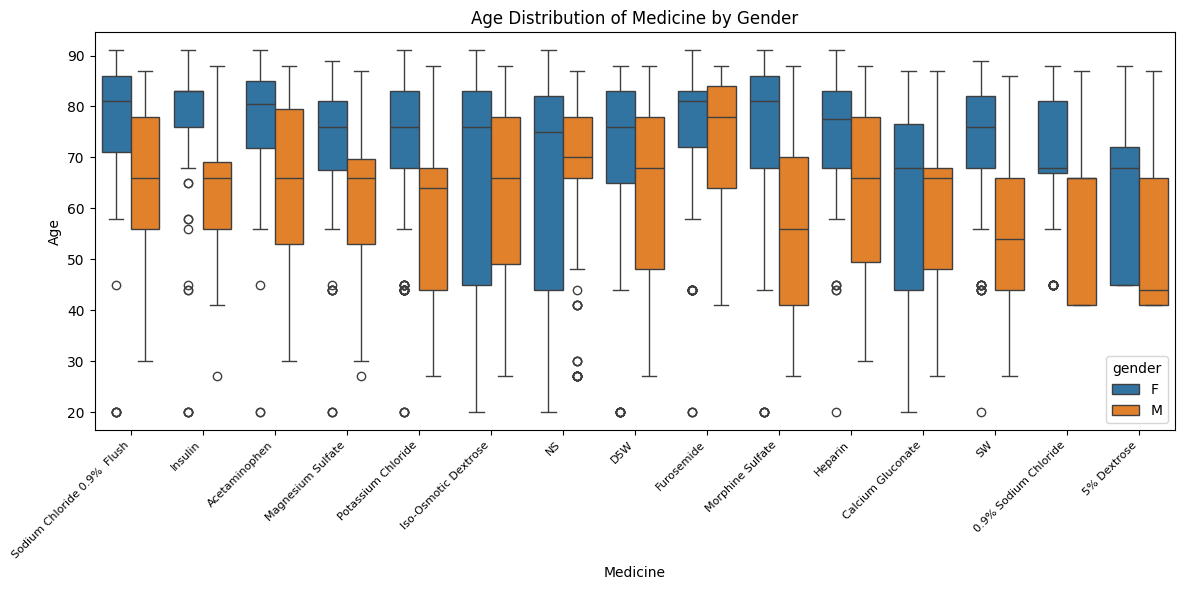

In [97]:
# Boxplot - Age Distribution per Medicine
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="drug", y="age", hue="gender")
plt.title("Age Distribution of Medicine by Gender")
plt.xlabel("Medicine")
plt.ylabel("Age")
plt.xticks(rotation=45, ha="right", fontsize=8)  # Rotate and align labels

plt.tight_layout()
plt.show()

#### Visualization-4 (Patient transfer by age and gender)


#### Explore transfers of patients

In [63]:
transfers = pd.read_csv('./data/TRANSFERS.csv')
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         524 non-null    int64  
 1   subject_id     524 non-null    int64  
 2   hadm_id        524 non-null    int64  
 3   icustay_id     167 non-null    float64
 4   dbsource       524 non-null    object 
 5   eventtype      524 non-null    object 
 6   prev_careunit  167 non-null    object 
 7   curr_careunit  167 non-null    object 
 8   prev_wardid    395 non-null    float64
 9   curr_wardid    395 non-null    float64
 10  intime         524 non-null    object 
 11  outtime        395 non-null    object 
 12  los            395 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 53.3+ KB


##### Joining transfer data to patient

In [67]:
patient_transfer = pd.merge(transfers, patients, on='subject_id', how='inner')
patient_transfer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id_x       492 non-null    int64  
 1   subject_id     492 non-null    int64  
 2   hadm_id        492 non-null    int64  
 3   icustay_id     156 non-null    float64
 4   dbsource       492 non-null    object 
 5   eventtype      492 non-null    object 
 6   prev_careunit  156 non-null    object 
 7   curr_careunit  156 non-null    object 
 8   prev_wardid    372 non-null    float64
 9   curr_wardid    372 non-null    float64
 10  intime         492 non-null    object 
 11  outtime        372 non-null    object 
 12  los            372 non-null    float64
 13  row_id_y       492 non-null    int64  
 14  gender         492 non-null    object 
 15  dob            492 non-null    object 
 16  dod            492 non-null    object 
 17  dod_hosp       301 non-null    object 
 18  dod_ssn   

In [68]:
patient_transfer['eventtype'].value_counts()

eventtype
transfer     252
admit        120
discharge    120
Name: count, dtype: int64

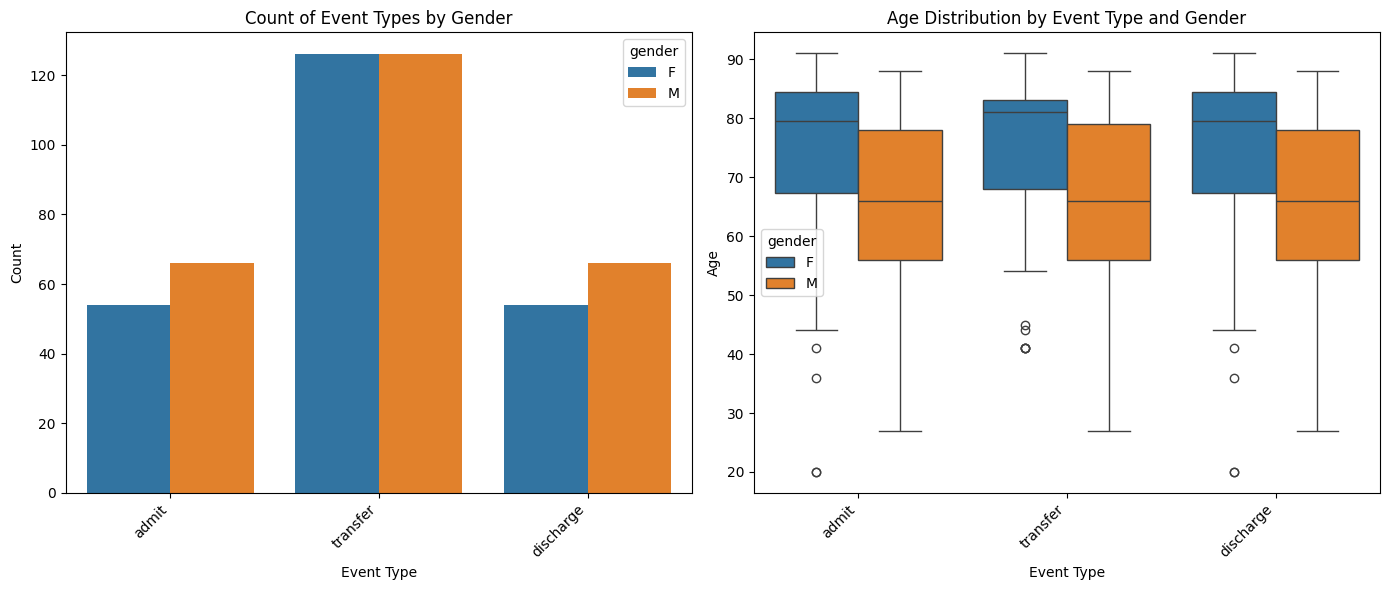

In [70]:
# Bar plot - Count of Event Types by Gender
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=patient_transfer, x="eventtype", hue="gender")
plt.title("Count of Event Types by Gender")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right", fontsize=10)

# Box plot - Age Distribution by Event Type and Gender
plt.subplot(1, 2, 2)
sns.boxplot(data=patient_transfer, x="eventtype", y="age", hue="gender")
plt.title("Age Distribution by Event Type and Gender")
plt.xlabel("Event Type")
plt.ylabel("Age")
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.tight_layout()
plt.show()

In [71]:
transfers['prev_careunit'].value_counts()

prev_careunit
MICU     95
SICU     27
CCU      26
TSICU    12
CSRU      7
Name: count, dtype: int64

In [72]:
transfers['curr_careunit'].value_counts()

curr_careunit
MICU     95
SICU     27
CCU      26
TSICU    12
CSRU      7
Name: count, dtype: int64

#### Explore CPT Events for Patients

#### Visualization-5 (CPT events by patients)


In [79]:
cptevents = pd.read_csv('./data/CPTEVENTS.csv')
patient_cptevents = pd.merge(cptevents, patients, on='subject_id', how='inner')
patient_cptevents.head()

,row_id_x,subject_id,hadm_id,costcenter,chartdate,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq,sectionheader,subsectionheader,description,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,4615,10117,105150,ICU,NaN,99254,99254,NaN,1.0,Evaluation and management,Consultations,NaN,9572,F,2072-05-05 00:00:00,2138-11-18 00:00:00,2138-11-18 00:00:00,NaN,1,66
1,4616,10117,105150,ICU,NaN,99231,99231,NaN,2.0,Evaluation and management,Hospital inpatient services,NaN,9572,F,2072-05-05 00:00:00,2138-11-18 00:00:00,2138-11-18 00:00:00,NaN,1,66
2,4617,10117,105150,ICU,NaN,90935,90935,NaN,3.0,Medicine,Dialysis,NaN,9572,F,2072-05-05 00:00:00,2138-11-18 00:00:00,2138-11-18 00:00:00,NaN,1,66
3,4618,10117,105150,ICU,NaN,99231,99231,NaN,4.0,Evaluation and management,Hospital inpatient services,NaN,9572,F,2072-05-05 00:00:00,2138-11-18 00:00:00,2138-11-18 00:00:00,NaN,1,66
4,7753,10111,174739,ICU,NaN,99253,99253,NaN,1.0,Evaluation and management,Consultations,NaN,9566,F,2097-01-16 00:00:00,2180-02-01 00:00:00,2180-02-01 00:00:00,2180-02-01 00:00:00,1,83


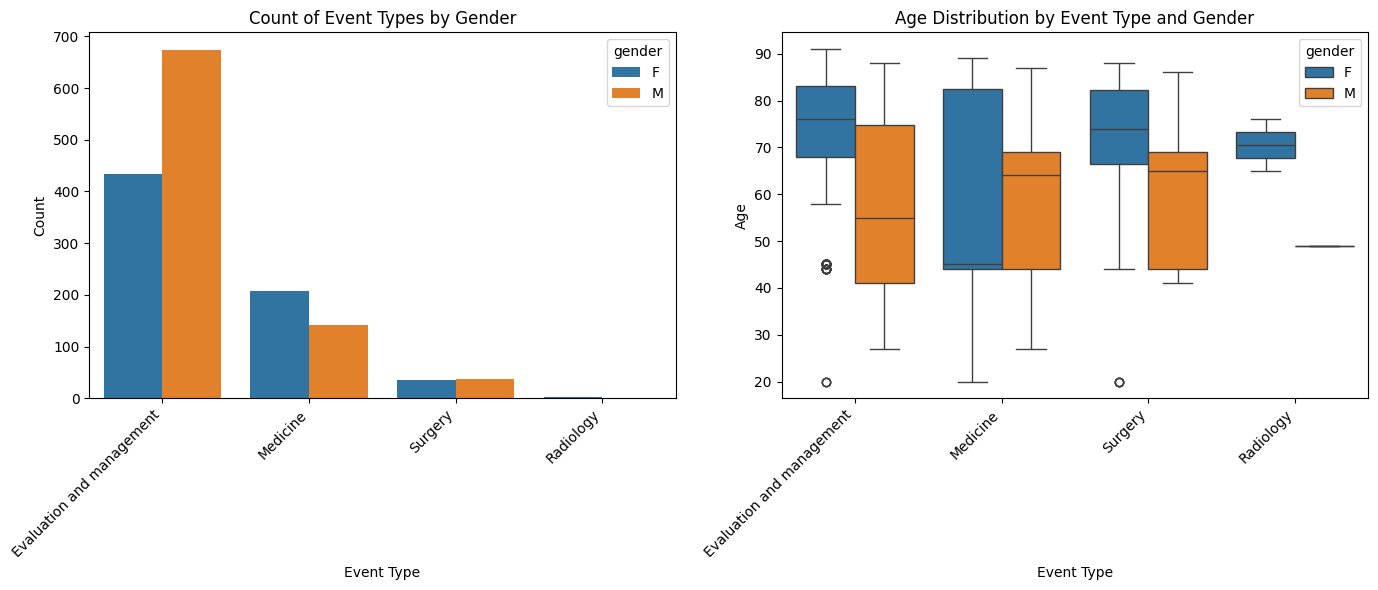

In [80]:
# Bar plot - Count of Event Types by Gender
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=patient_cptevents, x="sectionheader", hue="gender")
plt.title("Count of Event Types by Gender")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right", fontsize=10)

# Box plot - Age Distribution by Event Type and Gender
plt.subplot(1, 2, 2)
sns.boxplot(data=patient_cptevents, x="sectionheader", y="age", hue="gender")
plt.title("Age Distribution by Event Type and Gender")
plt.xlabel("Event Type")
plt.ylabel("Age")
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.tight_layout()
plt.show()